In [162]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
#  Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.mode.chained_assignment = None  # supress wanrings
pd.set_option('display.max_columns', 500)

In [163]:
import pandas 
houseData = pd.read_csv("train.csv")
print(houseData.shape)
houseData.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [164]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [165]:
houseData.drop('Id', axis=1,inplace=True)

In [166]:
houseData.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000,1201.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1452.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1379.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,56.89726,70.04996,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.68526,443.63973,46.54932,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,0.42534,0.05753,1.56507,0.38288,2.86644,1.04658,6.51781,0.61301,1978.50616,1.76712,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,2.75890,43.48904,6.32192,2007.81575,180921.19589
std,42.30057,24.28475,9981.26493,1.38300,1.11280,30.20290,20.64541,181.06621,456.09809,161.31927,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,0.51891,0.23875,0.55092,0.50289,0.81578,0.22034,1.62539,0.64467,24.68972,0.74732,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,40.17731,496.12302,2.70363,1.32810,79442.50288
min,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1900.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2006.00000,34900.00000
25%,20.00000,59.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,0.00000,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,0.00000,0.00000,1.00000,0.00000,2.00000,1.00000,5.00000,0.00000,1961.00000,1.00000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,2007.00000,129975.00000
50%,50.00000,69.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,0.00000,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,0.00000,0.00000,2.00000,0.00000,3.00000,1.00000,6.00000,1.00000,1980.00000,2.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000,2008.00000,163000.00000
75%,70.00000,80.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,166.00000,712.25000,0.00000,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,1.00000,0.00000,2.00000,1.00000,3.00000,1.00000,7.00000,1.00000,2002.00000,2.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.00000,2009.00000,214000.00000
max,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,1474.00000,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,3.00000,2.00000,3.00000,2.00000,8.00000,3.00000,14.00000,3.00000,2010.00000,4.00000,1418.00000,857.00000,547.00000,552.00000,508.00000,480.00000,738.00000,15500.00000,12.00000,2010.00000,755000.00000


In [167]:
# original shape
print("Original Shape :" + houseData.shape.__str__())


Original Shape :(1460, 80)


In [168]:
# removing all null columns
null_columns = houseData.isnull().mean() == 1
houseData_cleaned = houseData.loc[:,null_columns.values != True]

# removing column where all values are same
unique_column = houseData_cleaned.nunique() == 1 
houseData_cleaned = houseData_cleaned.loc[: , unique_column.values != True]

# removing  duplicate rows
houseData_cleaned = houseData_cleaned.drop_duplicates()
# no such row was detected
# all rows are unique
print("Updated Shape :" + houseData_cleaned.shape.__str__())
#Good that our data frame does not needs cleaning as we have already less number of data sets

Updated Shape :(1460, 80)


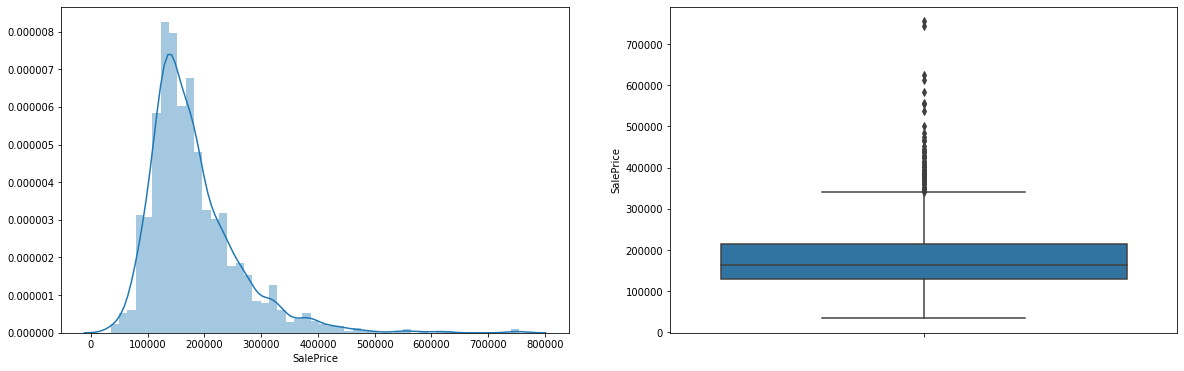

In [169]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.distplot(houseData_cleaned.SalePrice)

plt.subplot(1,2,2)
sns.boxplot(y=houseData_cleaned.SalePrice)

plt.show()

### Sale price mostly lies between 0 to 500000

In [170]:
#get Percentage of missing values per columns
def getMissingPercent():
    df_missing=pd.DataFrame((round(100*(houseData_cleaned.isnull().sum()/len(houseData_cleaned.index)), 2)), columns=['missing'])
    print(df_missing.sort_values(by=['missing'], ascending=False).head(20))
getMissingPercent()

              missing
PoolQC       99.52000
MiscFeature  96.30000
Alley        93.77000
Fence        80.75000
FireplaceQu  47.26000
LotFrontage  17.74000
GarageYrBlt   5.55000
GarageCond    5.55000
GarageType    5.55000
GarageFinish  5.55000
GarageQual    5.55000
BsmtExposure  2.60000
BsmtFinType2  2.60000
BsmtCond      2.53000
BsmtQual      2.53000
BsmtFinType1  2.53000
MasVnrArea    0.55000
MasVnrType    0.55000
Electrical    0.07000
MSSubClass    0.00000


In [171]:
#Using Data dictionary provided to impute missing values
# In column 'PoolQC' NaN stands for No Pool
houseData_cleaned['PoolQC'] = houseData_cleaned['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature'NaN stands for None, meaning the house has no miscellaneous features.
houseData_cleaned['MiscFeature'] = houseData_cleaned['MiscFeature'].fillna('None')

# In column 'Alley' NaN stands for No Alley Access as per the data dictionary
houseData_cleaned['Alley'] = houseData_cleaned['Alley'].fillna('No_Alley_Access')

# In column 'Fence (Fence Quality), NaN stands for No Fence as per the data dictionary
houseData_cleaned['Fence'] = houseData_cleaned['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' NaN stands for No Fireplace as per the data dictionary
houseData_cleaned['FireplaceQu'] = houseData_cleaned['FireplaceQu'].fillna('No_Fireplace')

#In column LotFrontage lets use 0 assuming house has no direct access to street
houseData_cleaned['LotFrontage'].fillna(0, inplace=True) 

#replacing Garage columns to No Garage for Na values and GarageYrBlt with 0
houseData_cleaned['GarageYrBlt'] = houseData_cleaned['GarageYrBlt'].fillna(0)
houseData_cleaned['GarageType'].fillna('No Garage', inplace=True) 
houseData_cleaned['GarageFinish'].fillna('No Garage', inplace=True) 
houseData_cleaned['GarageQual'].fillna('No Garage', inplace=True) 
houseData_cleaned['GarageCond'].fillna('No Garage', inplace=True)


#replacing Basement columns to No Garage for Na values
houseData_cleaned['BsmtFinType2'].fillna('No Basement', inplace=True) 
houseData_cleaned['BsmtExposure'].fillna('No Basement', inplace=True) 
houseData_cleaned['BsmtCond'].fillna('No Basement', inplace=True) 
houseData_cleaned['BsmtQual'].fillna('No Basement', inplace=True) 
houseData_cleaned['BsmtFinType1'].fillna('No Basement', inplace=True) 

#replacing MasVnrType column to None for Na values and MasVnrArea by 0

houseData_cleaned['MasVnrType'].fillna('None', inplace=True) 
houseData_cleaned['MasVnrArea'].fillna(0, inplace=True) 
houseData_cleaned['MasVnrArea'].fillna(0, inplace=True) 

#replacing Electrical column to SBrkr which stands for Standard Circuit Breakers & Romex

houseData_cleaned['Electrical'].fillna('SBrkr', inplace=True) 


getMissingPercent()

              missing
MSSubClass    0.00000
MSZoning      0.00000
GarageYrBlt   0.00000
GarageType    0.00000
FireplaceQu   0.00000
Fireplaces    0.00000
Functional    0.00000
TotRmsAbvGrd  0.00000
KitchenQual   0.00000
KitchenAbvGr  0.00000
BedroomAbvGr  0.00000
HalfBath      0.00000
FullBath      0.00000
BsmtHalfBath  0.00000
BsmtFullBath  0.00000
GrLivArea     0.00000
LowQualFinSF  0.00000
2ndFlrSF      0.00000
1stFlrSF      0.00000
GarageFinish  0.00000


In [172]:
#converting year to number of years
houseData_cleaned['YearBuilt'] = datetime.datetime.now().year - houseData_cleaned['YearBuilt']
houseData_cleaned['YearRemodAdd'] = datetime.datetime.now().year - houseData_cleaned['YearRemodAdd']
houseData_cleaned['GarageYrBlt'] = datetime.datetime.now().year - houseData_cleaned['GarageYrBlt']
# as no garage has 0 in it
houseData_cleaned['GarageYrBlt'].replace(datetime.datetime.now().year,0)
houseData_cleaned['YrSold'] = datetime.datetime.now().year - houseData_cleaned['YrSold']
houseData_cleaned

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00000,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,17.00000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Pool,No_Fence,None,0,2,12,WD,Normal,208500
1,20,RL,80.00000,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,44.00000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Pool,No_Fence,None,0,5,13,WD,Normal,181500
2,60,RL,68.00000,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,19.00000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Pool,No_Fence,None,0,9,12,WD,Normal,223500
3,70,RL,60.00000,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,22.00000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Pool,No_Fence,None,0,2,14,WD,Abnorml,140000
4,60,RL,84.00000,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,20.00000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Pool,No_Fence,None,0,12,12,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.00000,7917,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,21,20,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,21.00000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No_Pool,No_Fence,None,0,8,13,WD,Normal,175000
1456,20,RL,85.00000,13175,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,42,32,Gable,CompShg,Plywood,Plywood,Stone,119.00000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,42.00000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No_Pool,MnPrv,None,0,2,10,WD,Normal,210000
1457,70,RL,66.00000,9042,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,79,14,Gable,CompShg,CemntBd,CmentBd,None,0.00000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,79.00000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No_Pool,GdPrv,Shed,2500,5,10,WD,Normal,266500
1458,20,RL,68

In [173]:
# all numeric (float and int) variables in the dataset
houseData_cleaned_numeric = houseData_cleaned.select_dtypes(include=['float64', 'int64'])
houseData_cleaned_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.00000,8450,7,5,17,17,196.00000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,17.00000,2,548,0,61,0,0,0,0,0,2,12,208500
1,20,80.00000,9600,6,8,44,44,0.00000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,44.00000,2,460,298,0,0,0,0,0,0,5,13,181500
2,60,68.00000,11250,7,5,19,18,162.00000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,19.00000,2,608,0,42,0,0,0,0,0,9,12,223500
3,70,60.00000,9550,7,5,105,50,0.00000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,22.00000,3,642,0,35,272,0,0,0,0,2,14,140000
4,60,84.00000,14260,8,5,20,20,350.00000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,20.00000,3,836,192,84,0,0,0,0,0,12,12,250000


In [174]:
# dropping categorical variables
categorical=['MSSubClass', 'OverallQual', 'OverallCond',
            'BsmtFullBath', 'BsmtHalfBath','FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
             'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold']
houseData_cleaned_numeric = houseData_cleaned_numeric.drop(categorical, axis=1)
houseData_cleaned_numeric.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,57.62329,10516.82808,48.73219,35.13425,103.11712,443.63973,46.54932,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,151.26027,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,2.75890,43.48904,12.18425,180921.19589
std,34.66430,9981.26493,30.20290,20.64541,180.73137,456.09809,161.31927,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,453.69730,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,40.17731,496.12302,1.32810,79442.50288
min,0.00000,1300.00000,10.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,34900.00000
25%,42.00000,7553.50000,20.00000,16.00000,0.00000,0.00000,0.00000,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,19.00000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.00000,129975.00000
50%,63.00000,9478.50000,47.00000,26.00000,0.00000,383.50000,0.00000,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,43.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.00000,163000.00000
75%,79.00000,11601.50000,66.00000,53.00000,164.25000,712.25000,0.00000,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,62.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,0.00000,13.00000,214000.00000
max,313.00000,215245.00000,148.00000,70.00000,1600.00000,5644.00000,1474.00000,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,2020.00000,1418.00000,857.00000,547.00000,552.00000,508.00000,480.00000,738.00000,15500.00000,14.00000,755000.00000


In [175]:
#OUTLIER TREATMENT making sure that we dont remove outlier if 0.95 quantile comes as 0

def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        if Q3 != 0:
            IQR = Q3 - Q1       
            dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [176]:
#removing outliers from numeric data in main cleaned DF
houseData_cleaned=remove_outliers(houseData_cleaned,(houseData_cleaned_numeric.columns))
houseData_cleaned[list(houseData_cleaned_numeric.columns)].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000,1448.00000
mean,57.60083,9897.13398,48.77831,35.15262,101.21340,436.78660,45.01865,569.06768,1050.87293,1157.20994,345.42610,5.89296,1508.52901,152.16920,471.54144,93.22445,46.35497,22.10152,3.43785,14.90401,2.45028,43.02072,12.18439,180102.20718
std,33.85478,4700.87282,30.27341,20.66375,175.19776,433.95702,156.01197,442.55034,417.41302,374.48498,435.14643,48.82136,512.40579,455.46148,212.81496,123.96013,65.92714,61.33759,29.43699,55.53097,38.34121,497.71890,1.32900,78768.85724
min,0.00000,1300.00000,10.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,34900.00000
25%,43.00000,7526.25000,19.75000,16.00000,0.00000,0.00000,0.00000,223.75000,794.75000,881.50000,0.00000,0.00000,1127.50000,19.00000,326.75000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.00000,129900.00000
50%,63.00000,9451.00000,47.00000,26.00000,0.00000,379.50000,0.00000,481.50000,990.00000,1085.50000,0.00000,0.00000,1456.00000,43.00000,478.00000,0.00000,24.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.00000,162700.00000
75%,79.00000,11503.00000,66.00000,53.00000,162.25000,706.00000,0.00000,810.25000,1284.50000,1382.25000,728.00000,0.00000,1771.75000,62.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,0.00000,13.00000,213000.00000
max,313.00000,50271.00000,148.00000,70.00000,1378.00000,2260.00000,1127.00000,2336.00000,3206.00000,3228.00000,2065.00000,572.00000,4676.00000,2020.00000,1390.00000,857.00000,547.00000,552.00000,508.00000,480.00000,738.00000,15500.00000,14.00000,755000.00000


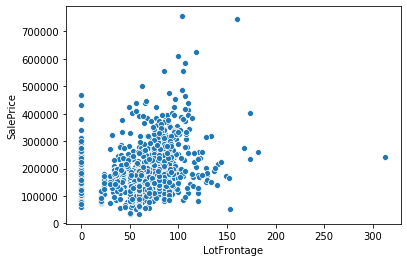

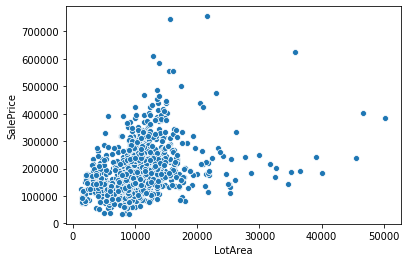

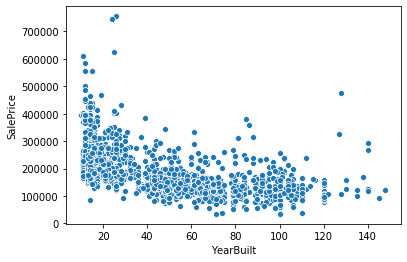

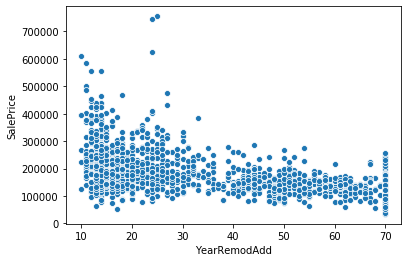

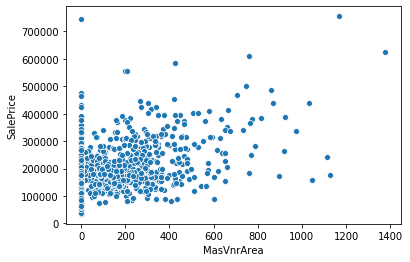

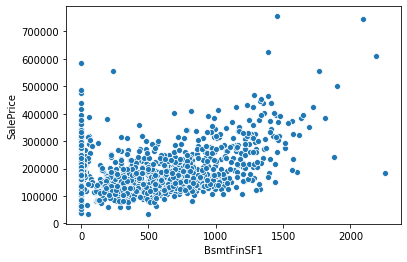

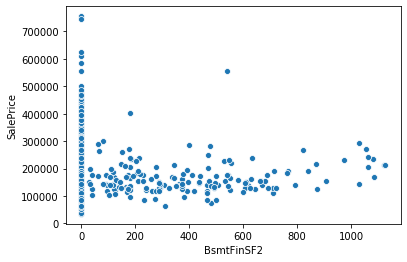

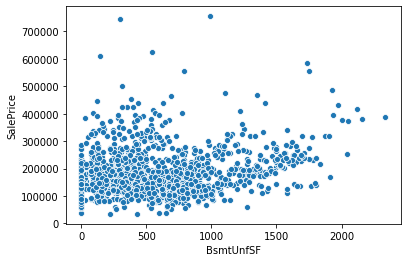

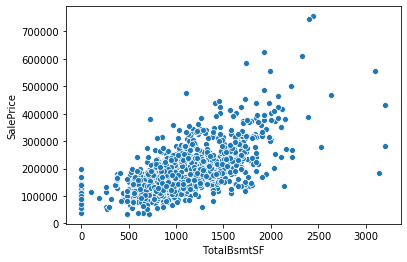

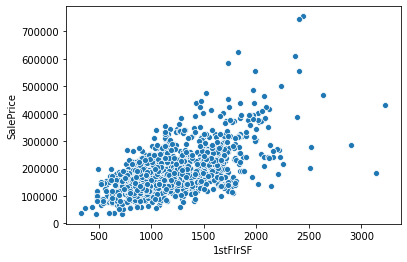

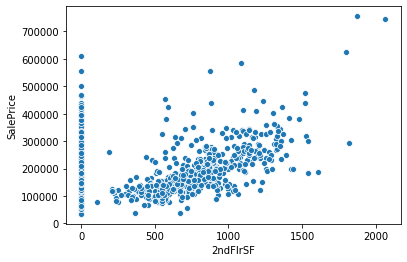

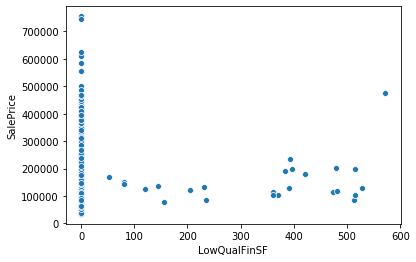

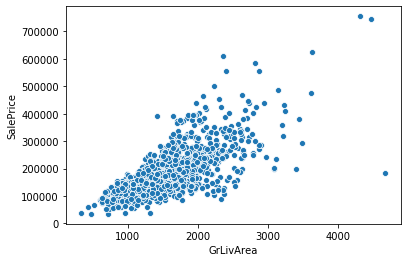

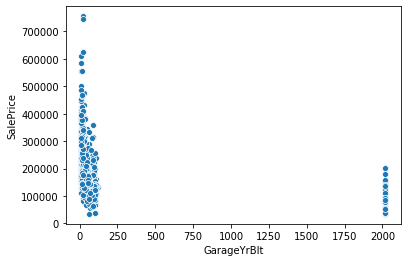

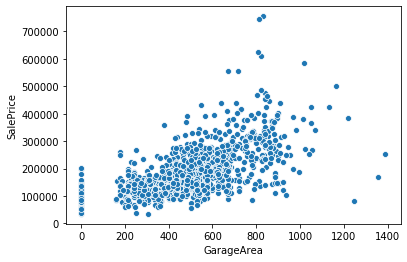

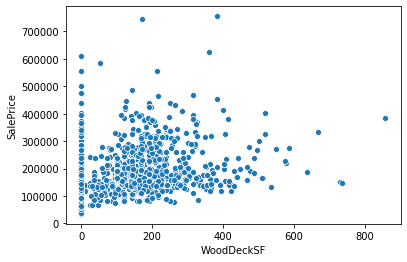

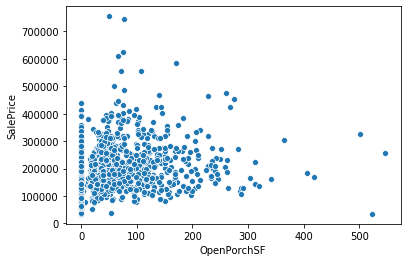

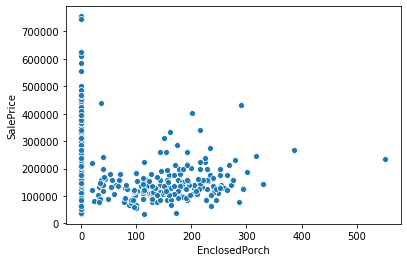

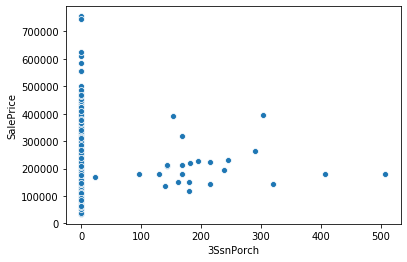

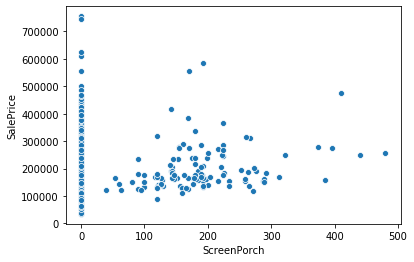

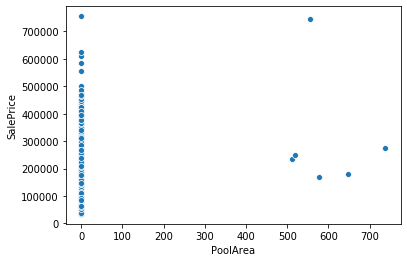

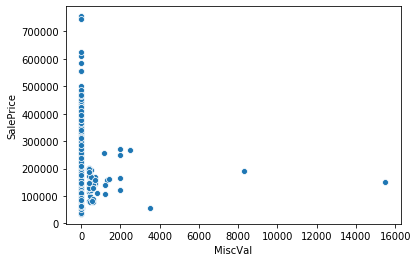

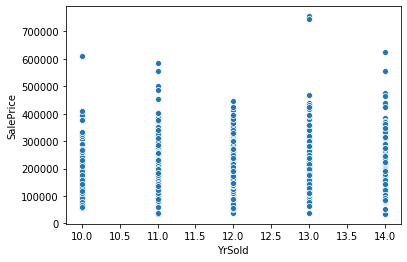

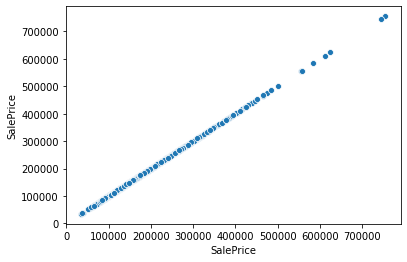

In [177]:
def scatterPlots(df):
    for i, col in enumerate(df.columns):
        plt.figure(i)
        sns.scatterplot(x = col, y = 'SalePrice', data = df)

 #plotting scatterPlots with SalePrice   
scatterPlots(houseData_cleaned[list(houseData_cleaned_numeric.columns)])

### From above scatter plots it can be seen that few variables like LotArea 1stFlrSF Gr LivArea exhibits a clear linear relation with SalePrice also other variables TotalBSMtSF also shows linear relation but has a few points at 0(we have filled missing values with 0 in such features earlier) 

In [178]:
# rechecking numeric varaibles
houseData_cleaned_numeric.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [179]:
# coverting vcolumns to categoricl based on data dict provided
categorical_change=['MSSubClass', 'OverallQual', 'OverallCond',
            'BsmtFullBath', 'BsmtHalfBath','FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
             'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
houseData_cleaned[categorical_change]=houseData_cleaned[categorical_change].astype('object')
houseData_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1448 non-null object
MSZoning         1448 non-null object
LotFrontage      1448 non-null float64
LotArea          1448 non-null int64
Street           1448 non-null object
Alley            1448 non-null object
LotShape         1448 non-null object
LandContour      1448 non-null object
Utilities        1448 non-null object
LotConfig        1448 non-null object
LandSlope        1448 non-null object
Neighborhood     1448 non-null object
Condition1       1448 non-null object
Condition2       1448 non-null object
BldgType         1448 non-null object
HouseStyle       1448 non-null object
OverallQual      1448 non-null object
OverallCond      1448 non-null object
YearBuilt        1448 non-null int64
YearRemodAdd     1448 non-null int64
RoofStyle        1448 non-null object
RoofMatl         1448 non-null object
Exterior1st      1448 non-null object
Exterior2nd      1448

In [180]:
#label Encoding
def labelEncoding(df,colList):
    for col in colList:
        df[col] = df[col].astype('category')
        df[col]=df[col].cat.codes
LabelEncodeColumn=["Street","CentralAir"] 
labelEncoding(houseData_cleaned,LabelEncodeColumn)

toInt=["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
       "KitchenAbvGr","Fireplaces","GarageCars","TotRmsAbvGrd"]
houseData_cleaned[toInt]=houseData_cleaned[toInt].astype('int64')
houseData_cleaned[LabelEncodeColumn+toInt].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1459
Data columns (total 11 columns):
Street          1448 non-null int8
CentralAir      1448 non-null int8
BsmtFullBath    1448 non-null int64
BsmtHalfBath    1448 non-null int64
FullBath        1448 non-null int64
HalfBath        1448 non-null int64
BedroomAbvGr    1448 non-null int64
KitchenAbvGr    1448 non-null int64
Fireplaces      1448 non-null int64
GarageCars      1448 non-null int64
TotRmsAbvGrd    1448 non-null int64
dtypes: int64(9), int8(2)
memory usage: 116.0 KB


In [181]:
houseData_categorical = houseData_cleaned.select_dtypes(include=['object'])

houseData_dummies = pd.get_dummies(houseData_categorical, drop_first=True)
houseData_dummies.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConL

In [182]:
houseData_cleaned = pd.concat([houseData_cleaned, houseData_dummies], axis=1)
houseData_cleaned = houseData_cleaned.drop(list(houseData_categorical.columns), axis=1)


In [183]:
houseData_cleaned.shape

(1448, 287)

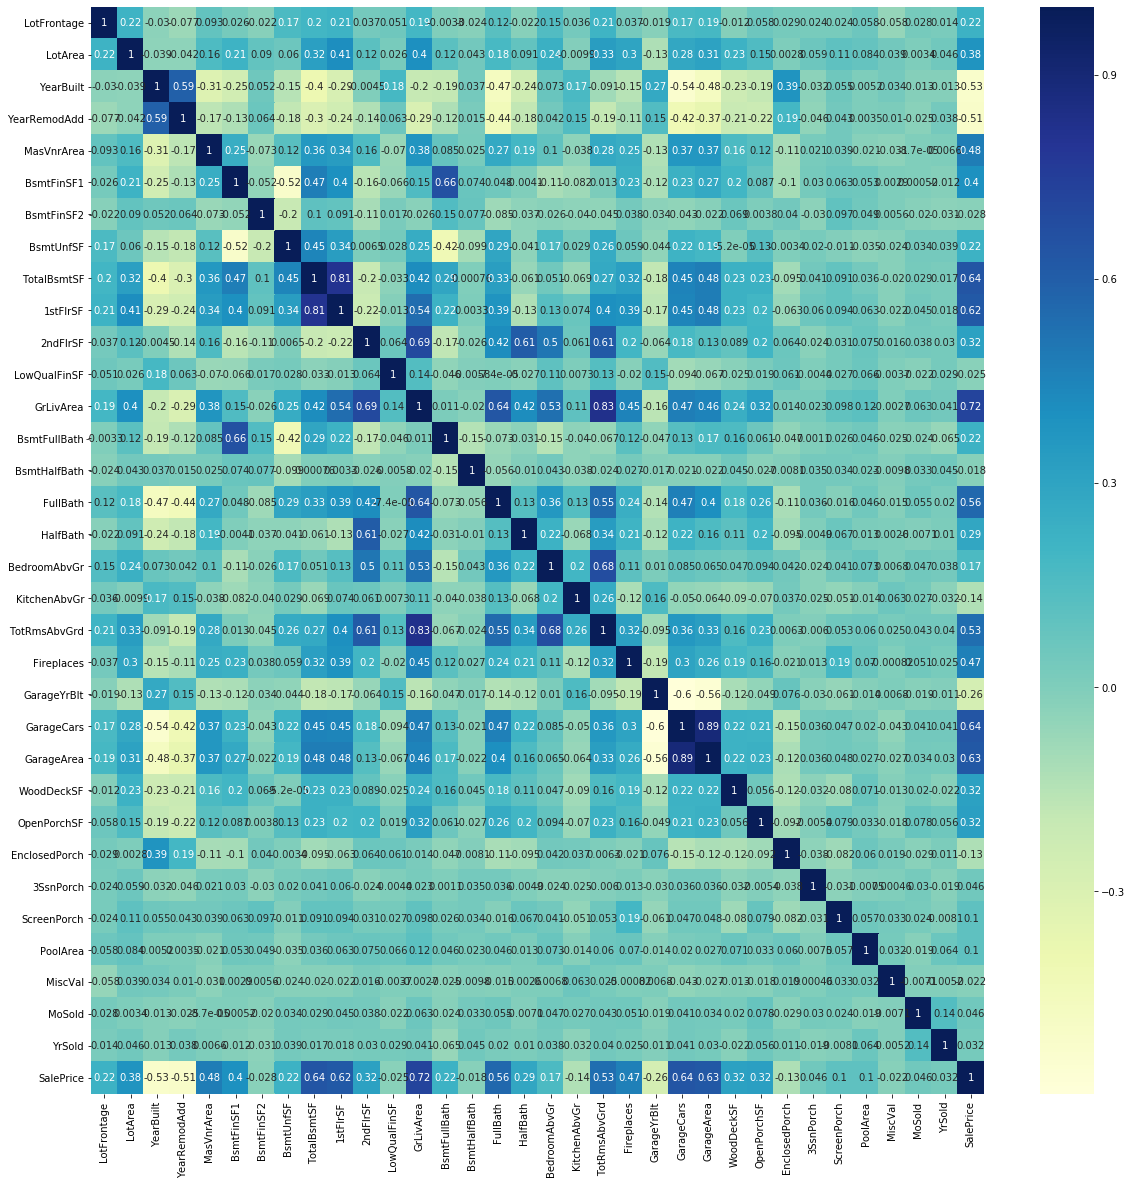

In [184]:
num_vars=houseData_cleaned.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(20,20))
corHeatmap=sns.heatmap(houseData_cleaned[num_vars].corr(), annot = True, cmap="YlGnBu")
#below 2 lines are for temporary fix for matplotlib regression feature which broke heatmap  between 3.1.0 and 3.1.1
bottom, top = corHeatmap.get_ylim()
corHeatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Certian features like TotalBsmtSF,1stFlrSF,GRLivArea,GarageClass etc do show good correlation with SalePrice 

In [185]:
#train_test_split
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(houseData_cleaned,train_size=0.70, random_state=100)
df_train.shape

(1013, 287)

In [186]:
y_train=df_train.pop('SalePrice')
X_train=df_train

y_test=df_test.pop('SalePrice')
X_test=df_test


In [187]:
num_vars=X_train.select_dtypes(include=['int64','float64']).columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train.head()

,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_G

In [188]:
#RIDGE REGULARIZATION
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import RFE


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [189]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02833,0.02195,0.00202,0.00404,0.00010,{'alpha': 0.0001},-22299.00708,-19116.79634,-17665.11461,-18125.94865,-18172.01978,-19077.60709,1680.42558,26,-10365.77352,-11365.41069,-12037.76042,-12057.00620,-11866.16004,-11538.42217,637.29397
1,0.01503,0.00319,0.00262,0.00226,0.00100,{'alpha': 0.001},-22286.52461,-19110.39111,-17647.20370,-18113.49210,-18154.98323,-19064.35169,1681.85923,25,-10366.11745,-11366.21241,-12037.82988,-12057.26190,-11865.82602,-11538.64953,637.14210
2,0.01109,0.00175,0.00159,0.00318,0.01000,{'alpha': 0.01},-22178.08754,-19011.82468,-17500.67089,-18004.99214,-18002.45749,-18941.45429,1693.21366,24,-10371.28073,-11375.09583,-12045.29277,-12063.92692,-11864.67327,-11544.05390,636.90641
3,0.00960,0.00194,0.00190,0.00310,0.05000,{'alpha': 0.05},-21889.81217,-18651.39260,-17132.90380,-17719.84061,-17567.48146,-18594.15903,1722.71021,23,-10396.15196,-11454.54216,-12090.43504,-12117.97728,-11884.80522,-11588.78233,641.82862
4,0.00810,0.00218,0.00212,0.00222,0.10000,{'alpha': 0.1},-21670.33797,-18361.56951,-16868.82993,-17528.99068,-17446.87934,-18377.07348,1716.17875,21,-10422.65035,-11546.94318,-12138.97867,-12178.57641,-11924.60651,-11642.35102,649.71028


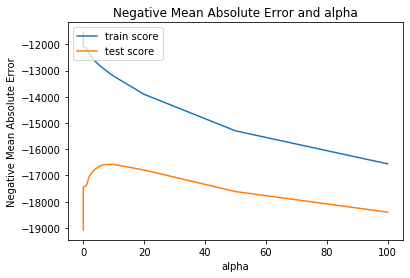

In [190]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [191]:
#optimal value of alpha for ridge without rfe
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 9.0}
-16579.14124718358


In [192]:
#From above graph and best param function our optimal value for Ridge Regression is 9
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.59398393e+02,  1.72932846e+03,  4.44830580e+03, -8.11332287e+03,
       -2.72372888e+03,  3.11844579e+03,  5.25968645e+03,  4.69969068e+01,
        5.09046740e+02,  5.87627702e+03,  1.25172046e+03,  7.19956355e+03,
        9.12665691e+03, -4.85759769e+02,  1.31671693e+04,  1.30130192e+03,
        6.71532167e+02,  3.91315942e+03,  1.69811825e+03, -1.44928598e+03,
       -5.14416236e+03,  3.64757935e+03,  4.60016537e+03,  1.80684548e+03,
        4.32770615e+03,  3.00788134e+03,  3.55552808e+03,  1.54524846e+03,
        1.40680786e+03,  1.27034968e+03,  3.53917530e+03,  6.83020662e+02,
       -4.55099220e+02, -1.32898382e+03, -1.29743181e+02, -2.49850859e+03,
        3.51693342e+01,  1.84199531e+03, -2.27230577e+03,  2.33089115e+03,
        5.10490429e+03,  2.25302581e+03, -2.14291559e+02, -1.44175756e+03,
       -2.91519383e+03, -6.53019186e+03, -7.41840766e+03, -1.12554934e+03,
       -1.35663523e+03,  7.33510490e+03,  1.54012274e+03,  6.33411198e+03,
        1.47991406e+03,  

In [193]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.915882400309222
0.9033125648368727


In [211]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
ridgePara=list(zip(cols, model_parameters_1))
res = sorted(ridgePara, key = lambda x: x[1]) 
res

[('KitchenAbvGr', -83242.234),
 ('GarageYrBlt', -33808.299),
 ('MSSubClass_70', -33668.697),
 ('GarageCars', -29429.06),
 ('MSSubClass_80', -27750.229),
 ('GarageArea', -26643.658),
 ('Fireplaces', -26305.434),
 ('BsmtFinSF1', -26060.599),
 ('3SsnPorch', -23120.608),
 ('CentralAir', -22451.462),
 ('MSSubClass_75', -22050.365),
 ('BsmtFinSF2', -21155.473),
 ('MSSubClass_120', -21034.496),
 ('WoodDeckSF', -19375.727),
 ('YearRemodAdd', -18948.147),
 ('TotRmsAbvGrd', -18948.147),
 ('MSSubClass_85', -18640.575),
 ('MasVnrArea', -16799.204),
 ('BsmtFullBath', -16117.811),
 ('MSSubClass_45', -15998.042),
 ('LotArea', -15889.882),
 ('MoSold', -14721.83),
 ('ScreenPorch', -13689.41),
 ('MSSubClass_60', -12916.711),
 ('YrSold', -11703.1),
 ('MSSubClass_40', -8359.813),
 ('BsmtHalfBath', 10402.392),
 ('MSSubClass_180', 12307.037),
 ('TotalBsmtSF', 12878.497),
 ('MiscVal', 13376.527),
 ('BsmtUnfSF', 13531.626),
 ('BedroomAbvGr', 13986.229),
 ('FullBath', 18216.457),
 ('MSSubClass_90', 19810.128),

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


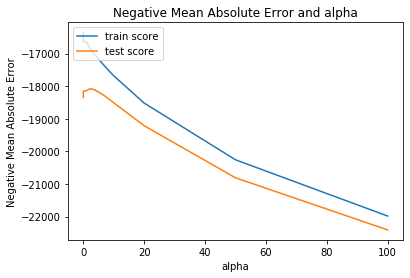

In [195]:
#RIDGE WITH RFE
#using rfe for feature selection as we are using ridge which does not provide feature elimination

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

rfe = RFE(ridge, 50)             
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [196]:
#optimal value of alpha for ridge with rfe
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-18083.781045239673


In [197]:
#From above graph and best param function our optimal value for Ridge Regression is 2
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 20079.44081396, -15889.88247963,  30136.23831623,  24232.0948657 ,
       -18948.14711974, -16799.20401283, -26060.59878857, -21155.47315794,
        13531.6260903 ,  12878.49692635, -22451.4616517 ,  33157.63999208,
        39176.45361   ,  30391.72715888,  42509.02448403, -16117.81147202,
        10402.39236575,  18216.45744205,  29383.82200097,  13986.22933324,
       -83242.2337643 , -18948.14711974, -26305.43436295, -33808.29901138,
       -29429.05988085, -26643.65770167, -19375.72727212,  41164.19087403,
        49642.02780817, -23120.60786353, -13689.40975199,  24884.68773842,
        13376.52706356, -14721.8301501 , -11703.09979511,  52107.10430983,
        -8359.81257163, -15998.04214604,  30883.63955429, -12916.71109251,
       -33668.69683083, -22050.36492165, -27750.22918713, -18640.57481335,
        19810.12759759, -21034.49600506,  23822.14730916,  12307.03666688,
        24899.91886872,  20588.55111078])

In [198]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test[X_train_rfe.columns])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8913948061078928
0.880640438596374


In [210]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
ridgePara=list(zip(cols, model_parameters_1))
res = sorted(ridgePara, key = lambda x: x[1]) 
res

[('Condition2_PosN', -83242.234),
 ('OverallQual_4', -33808.299),
 ('KitchenQual_Fa', -33668.697),
 ('OverallQual_5', -29429.06),
 ('KitchenQual_TA', -27750.229),
 ('OverallQual_6', -26643.658),
 ('OverallQual_3', -26305.434),
 ('MSSubClass_160', -26060.599),
 ('OverallCond_3', -23120.608),
 ('LandSlope_Sev', -22451.462),
 ('KitchenQual_Gd', -22050.365),
 ('MSSubClass_180', -21155.473),
 ('GarageCond_Po', -21034.496),
 ('OverallQual_7', -19375.727),
 ('MSSubClass_90', -18948.147),
 ('BldgType_Duplex', -18948.147),
 ('Functional_Sev', -18640.575),
 ('MSSubClass_120', -16799.204),
 ('Condition1_RRAe', -16117.811),
 ('Foundation_Wood', -15998.042),
 ('YearBuilt', -15889.882),
 ('RoofMatl_Tar&Grv', -14721.83),
 ('OverallCond_4', -13689.41),
 ('Heating_OthW', -12916.711),
 ('RoofMatl_WdShake', -11703.1),
 ('Exterior2nd_Other', -8359.813),
 ('Condition1_RRNn', 10402.392),
 ('SaleType_CWD', 12307.037),
 ('LotShape_IR2', 12878.497),
 ('RoofMatl_Metal', 13376.527),
 ('MSZoning_FV', 13531.626),


### Using ridge after rfe the most important predictors have certainly changed 

In [200]:
#Laso

lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   28.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [201]:
cv_results = pd.DataFrame(model_cv_l.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.17612,0.07547,0.00091,0.00182,0.00010,{'alpha': 0.0001},-21998.47182,-19238.19073,-17738.27450,-18239.47706,-17941.33554,-19033.00727,1571.57318,27,-10370.48443,-11372.79953,-12050.59474,-12057.48629,-11868.28079,-11543.92916,637.48142
1,0.17527,0.05307,0.00040,0.00080,0.00100,{'alpha': 0.001},-22002.42857,-19238.06657,-17735.30119,-18239.07239,-17939.78771,-19032.79012,1573.81225,26,-10370.47401,-11372.78209,-12050.57855,-12057.47079,-11868.26867,-11543.91482,637.47989
2,0.24950,0.02832,0.00102,0.00091,0.01000,{'alpha': 0.01},-22042.08142,-19236.86104,-17705.56616,-18234.64774,-17924.26482,-19030.55833,1596.29263,25,-10370.48563,-11372.80846,-12050.54787,-12057.44612,-11868.22300,-11543.90222,637.46070
3,0.23941,0.01180,0.00121,0.00241,0.05000,{'alpha': 0.05},-22159.37375,-19229.35645,-17629.02436,-18217.98627,-17852.45150,-19019.57809,1664.82002,24,-10370.63161,-11373.02864,-12050.46819,-12057.40733,-11868.04473,-11543.91610,637.35809
4,0.27692,0.02129,0.00171,0.00167,0.10000,{'alpha': 0.1},-22125.33545,-19211.50189,-17553.65084,-18202.06128,-17787.49174,-18977.94552,1674.87879,23,-10370.89265,-11373.73429,-12050.44642,-12057.42505,-11867.46667,-11543.99301,637.16485


In [202]:
#optimal value of alpha for Lasso
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 100}
-16324.605320602865


In [203]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [204]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9205423390454985
0.9162562638199698


In [205]:
# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasoPara=list(zip(cols, model_parameters_1))
#omitting values with 0 coeff
lasoPara=[x for x in lasoPara if x[1] != 0]
lasoPara
res = sorted(lasoPara, key = lambda x: x[1]) 
res

[('Condition2_PosN', -154154.683),
 ('OverallCond_3', -18001.952),
 ('OverallCond_4', -13543.472),
 ('LandSlope_Sev', -11417.519),
 ('YearBuilt', -10390.372),
 ('KitchenQual_Gd', -9810.595),
 ('BsmtQual_Gd', -9703.378),
 ('KitchenQual_TA', -8357.39),
 ('Neighborhood_Edwards', -8207.804),
 ('BldgType_TwnhsE', -7943.056),
 ('BldgType_Twnhs', -7158.858),
 ('OverallCond_5', -7056.768),
 ('OverallQual_4', -6911.788),
 ('Neighborhood_Mitchel', -6891.468),
 ('OverallQual_5', -6608.947),
 ('MSSubClass_160', -6146.315),
 ('OverallQual_6', -5887.181),
 ('KitchenAbvGr', -5674.089),
 ('ExterQual_TA', -5001.484),
 ('KitchenQual_Fa', -4840.567),
 ('BsmtQual_TA', -4192.807),
 ('RoofMatl_Tar&Grv', -3745.648),
 ('BsmtExposure_No', -3517.054),
 ('SaleType_WD', -3059.832),
 ('YearRemodAdd', -3037.332),
 ('Neighborhood_NAmes', -2588.511),
 ('Electrical_SBrkr', -2500.695),
 ('Neighborhood_MeadowV', -2267.182),
 ('Neighborhood_NWAmes', -2171.831),
 ('BsmtFinType2_Rec', -2122.218),
 ('FireplaceQu_TA', -1918.

In [206]:
#using rfe to reduce feature initially and then further use lasso to reduce feature and regularization

#Laso

lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv_l.cv_results_)
#optimal value of alpha for Lasso
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 50}
-18327.620731874285


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


In [207]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [208]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test[X_train_rfe.columns])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8932880407055397
0.887118248880519


In [209]:
# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
lasoPara=list(zip(cols, model_parameters_1))
#omitting values with 0 coeff
lasoPara=[x for x in lasoPara if x[1] != 0]
lasoPara
res = sorted(lasoPara, key = lambda x: x[1]) 
print(len(res))
res

44


[('Condition2_PosN', -181022.012),
 ('MSSubClass_90', -36364.59),
 ('KitchenQual_Fa', -34965.505),
 ('OverallQual_4', -33340.467),
 ('OverallQual_5', -29031.025),
 ('KitchenQual_TA', -27482.708),
 ('OverallQual_3', -26099.166),
 ('MSSubClass_160', -25935.609),
 ('OverallQual_6', -25834.982),
 ('OverallCond_3', -22296.948),
 ('KitchenQual_Gd', -21481.496),
 ('MSSubClass_180', -19636.651),
 ('GarageCond_Po', -18772.144),
 ('OverallQual_7', -18600.689),
 ('MSSubClass_120', -16302.653),
 ('LandSlope_Sev', -16137.26),
 ('YearBuilt', -16033.869),
 ('Condition1_RRAe', -14129.772),
 ('RoofMatl_Tar&Grv', -13348.182),
 ('OverallCond_4', -12271.127),
 ('Functional_Sev', -6398.21),
 ('Foundation_Wood', -5915.006),
 ('BldgType_Duplex', -1613.314),
 ('Condition2_Norm', 2204.334),
 ('SaleType_CWD', 2703.46),
 ('Street', 6586.068),
 ('LotShape_IR2', 10207.342),
 ('MSZoning_FV', 12574.037),
 ('Functional_Typ', 19517.812),
 ('PoolQC_Gd', 19618.536),
 ('SaleType_New', 21591.182),
 ('OverallCond_9', 22175

### From Lasso technique we get benefits of feature elimination and can see that features like OverallQual,RoofMatl,Neighbourhood  have an impact on housing pricing
    